<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/Dimitrios/Fruitdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the neseccary libraries

In [1]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 837.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

Now restart the runtime for the pytorch version change to take effect.
Run the code blocks below to import the packages also you will have to upload the object_detection_utils.py to the workspace to access the functions

In [12]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
import matplotlib.pyplot as plt
#from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2
import torchvision.models as models
import json
import random
import os
import numpy as np
#from object_detection_utils import FileBasedAPCalculator
from object_detection_utils import *

# Download the dataset
First, let's download the dataset. It consists of images of plant, bounding box annotations, and leaf counts annotations.

In [13]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

fatal: destination path 'fruit-detection-challenge' already exists and is not an empty directory.


## The COCO dataset format

The labels for this detection dataset are stored using the COCO JSON format. COCO JSON is a data format used for object detection, segmentation, and keypoint annotation in images. It includes metadata like image paths, annotations, categories, and licenses, typically structured into keys such as "images," "annotations," "categories," and more.

Example structure:
```json
{
  "images": [
    {
      "id": 1,
      "width": 640,
      "height": 480,
      "file_name": "image1.jpg",
      "license": 1,
      "date_captured": "2023-10-01"
    }
  ],
  "annotations": [
    {
      "id": 1,
      "image_id": 1,
      "category_id": 1,
      "bbox": [50, 70, 80, 60],
      "area": 4800,
      "segmentation": [[121.39,215.89,...]],
      "iscrowd": 0
    }
  ],
  "categories": [
    {
      "id": 1,
      "name": "cat",
      "supercategory": "animal"
    },
    {
      "id": 2,
      "name": "dog",
      "supercategory": "animal"
    }
  ]
}
```

In [68]:
import json

json_path = "fruit-detection-challenge/detection/annotations/train.json"

import random
from PIL import Image
from object_detection_utils import plot_bbox

In [69]:

import json
import os
import torch
from PIL import Image


class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None, max_objects=10):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)
        self.max_objects = max_objects

        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        img_info = self.images[idx]
        img_filename = img_info['file_name']
        img_id = img_info['id']
        img_path = os.path.join(self.img_folder, img_filename)

        annotations = self.img_id_to_annotations.get(img_id, [])

        img = Image.open(img_path).convert("RGB")

        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, x + width, y + height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # Resize image and boxes using the defined resizing function
        img, bboxes = self.resize(image=img, boxes=bboxes)

        # Convert bbox to center x, center y, width, height format
        cxcywh_boxes = []
        for box in bboxes:
          x_min, y_min, x_max, y_max = box
          width = x_max - x_min
          height = y_max - y_min
          center_x = x_min + width / 2.0
          center_y = y_min + height / 2.0
          cxcywh_boxes.append([center_x, center_y, width, height])

        if self.transforms:
            img = self.transforms(img)

        illegal_needed = max(self.max_objects - len(bboxes), 0)
        illegal_labels = torch.ones((illegal_needed,), dtype=torch.int64) * -1
        illegal_boxes = torch.zeros((illegal_needed, 4), dtype=torch.float32)

        return img, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((bboxes, illegal_boxes), axis=0),
        }

    def __len__(self):
        return len(self.images)



##Model implementation
We will use a ResNet Backbone

In [61]:
class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(PredictionHead, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 2, in_channels // 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 4, in_channels // 4, kernel_size=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
        )

        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=num_classes, kernel_size=(3, 3), stride=(1, 1), padding=1),
        )

        # Objectness score predictor
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        cls_logits = self.classifier(x)
        bbox_pred = self.box_predictor(x)
        objectness_pred = self.objectness_predictor(x)

        # Add relative grid position to the cx and cy predictions of each box
        grid_size = x.shape[-1]
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid_size, device=x.device), torch.arange(grid_size, device=x.device), indexing="ij"
        )
        cx = bbox_pred[:, 0, :, :]
        cy = bbox_pred[:, 1, :, :]
        w = bbox_pred[:, 2, :, :]
        h = bbox_pred[:, 3, :, :]
        cx = (cx + (grid_x)) / grid_size
        cy = (cy + (grid_y)) / grid_size
        bbox_pred = torch.stack([cx, cy, w, h], dim=1)

        return cls_logits, bbox_pred, objectness_pred

class ObjectDetector(nn.Module):
    def __init__(self, n_classes, pretrained=True):
        super(ObjectDetector, self).__init__()

        # We add the background class
        self.n_classes = n_classes

        # Backbone
        backbone = models.resnet18(pretrained=pretrained)
        self.backbone = nn.Sequential(*list(backbone.children())[:-3])

        # Layer 1
        self.block_1 = nn.Sequential(*list(backbone.children())[-3])

        self.prediction_head = PredictionHead(512, self.n_classes)

    def forward(self, x):
        features = self.backbone(x)
        y_ = self.block_1(features)

        cls_logits, bbox_pred, objectness_pred = self.prediction_head(y_)
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)

        return {"pred_logits": cls_preds, "pred_boxes": box_preds, "pred_objectness": obj_preds}

### Using the two-step approach
Below is the dataset implementation to train the classifier.



In [70]:
import torchvision


data_dir = "fruit-detection-challenge/classification"

train_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'))
val_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'))

In [63]:
train_imgs.classes

['apple', 'banana', 'orange', 'pear']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

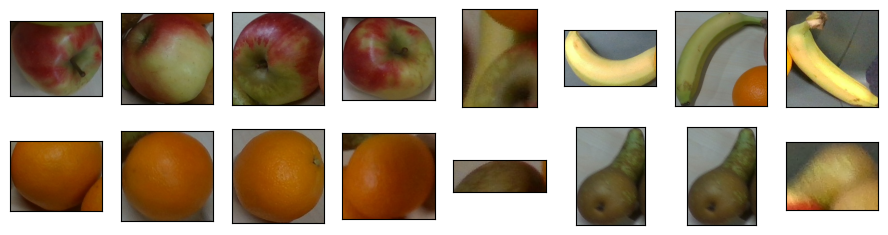

In [71]:
from d2l import torch as d2l

class_names = train_imgs.classes
images = []

for i in range(len(train_imgs.classes)):
    class_idx = i % len(class_names)
    class_name = class_names[class_idx]
    class_images = [img for img, label in train_imgs if label == class_idx]
    for i in range(4): # Select 4 random images from the class
        images.append(random.choice(class_images))

d2l.show_images(images, 2, 8, scale=1.4)

## Training the model


In [73]:
import torchvision.transforms as T

your_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Basic ImageNet stats
                        std=[0.229, 0.224, 0.225]),
])

In [74]:
import torch
import torchvision.transforms as transforms

# Parameters
img_size = (256, 256)  # Define your image size
batch_size = 32        # Define your batch size

# Define the transforms you want to use on the images
your_transforms = transforms.Compose([
    transforms.Resize(img_size),  # Resize the images to the target size
    transforms.ToTensor(),        # Convert image to Tensor
    # Optionally add normalization if needed
    # transforms.Normalize(mean=[mean], std=[std]),
])

# Train dataset and loader
train_dataset = FruitDetectionDataset(
    json_path="fruit-detection-challenge/detection/annotations/train.json",
    img_folder="fruit-detection-challenge/detection/train",
    img_size=img_size,
    transforms=your_transforms  # Apply your transformations to the images
)

# Define custom collate function for handling batches in object detection
def detection_collate_fn(batch):
    images = []
    targets = []

    for img, target in batch:
        images.append(img)
        # Convert all elements to tensors if they aren't already
        processed_target = {
            'labels': target['labels'] if isinstance(target['labels'], torch.Tensor)
                      else torch.tensor(target['labels'], dtype=torch.int64),
            'boxes': target['boxes'] if isinstance(target['boxes'], torch.Tensor)
                    else torch.tensor(target['boxes'], dtype=torch.float32)
        }
        targets.append(processed_target)

    return torch.stack(images, 0), targets


Visualize a batch of Images with bounding boxes

In [75]:
# Set up the train DataLoader
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    collate_fn=detection_collate_fn  # Use the custom collate function
)

# Validation dataset and loader
val_dataset = FruitDetectionDataset(
    json_path="fruit-detection-challenge/detection/annotations/val.json",
    img_folder="fruit-detection-challenge/detection/val",
    img_size=img_size,
    transforms=your_transforms  # Same or slightly different from the train transforms
)

# Set up the validation DataLoader (usually no shuffle for validation)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=1,  # Validation batch size is often 1
    shuffle=False,
    num_workers=2
)

# Check if the DataLoader works correctly by fetching a batch from the train_loader
data_iter = iter(train_loader)
images, targets = next(data_iter)

# Show an image from the batch
import matplotlib.pyplot as plt
image = images[0].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
plt.imshow(image)
plt.title("Sample Image")
plt.axis('off')
plt.show()

# Print out the target info for the first sample in the batch
print("Targets for this image:", targets[0])  # This will show the bounding boxes and labels

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "<ipython-input-69-6aa142c8e03c>", line 82, in __getitem__
    "labels": torch.cat((labels, illegal_labels)),
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: expected Tensor as element 0 in argument 0, but got list


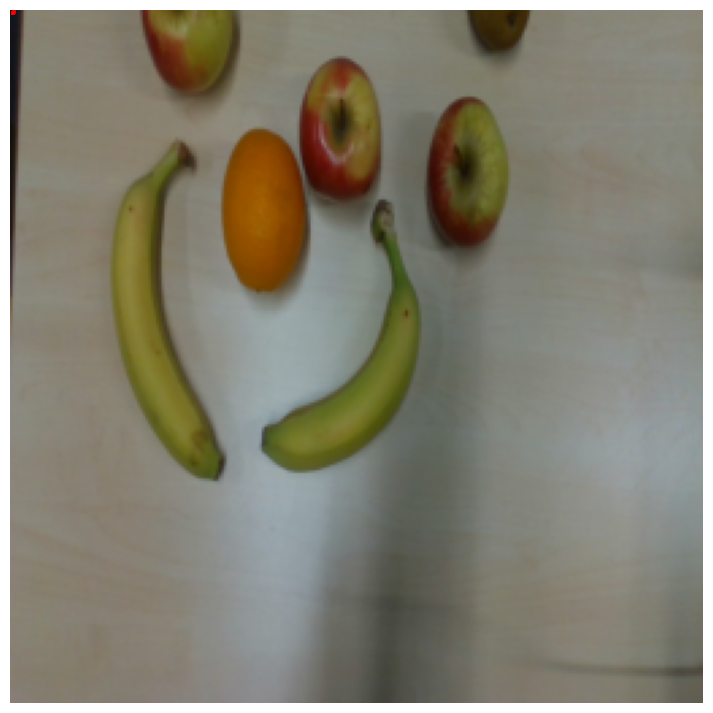

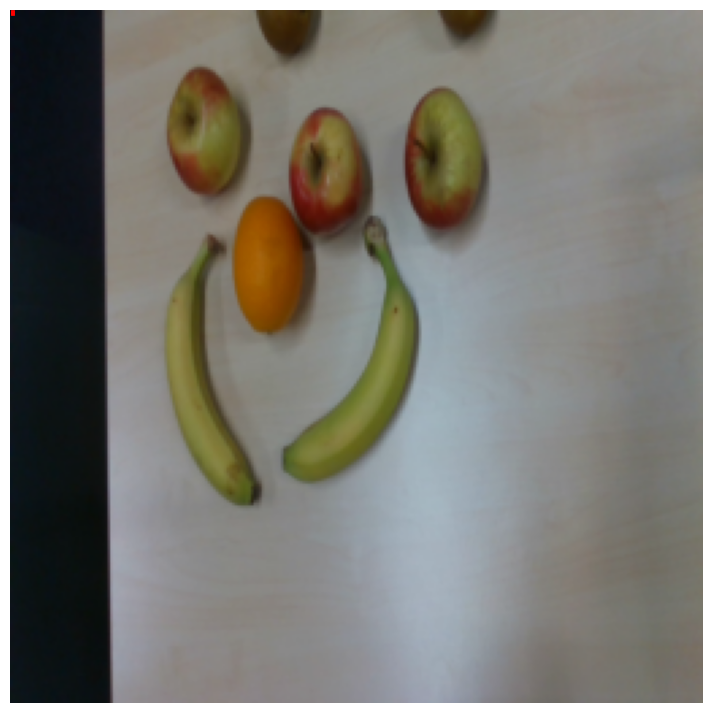

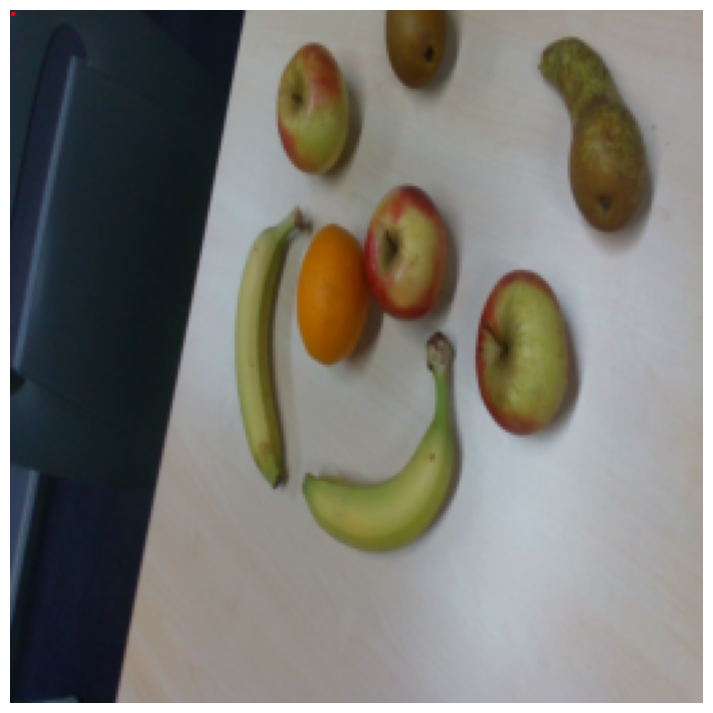

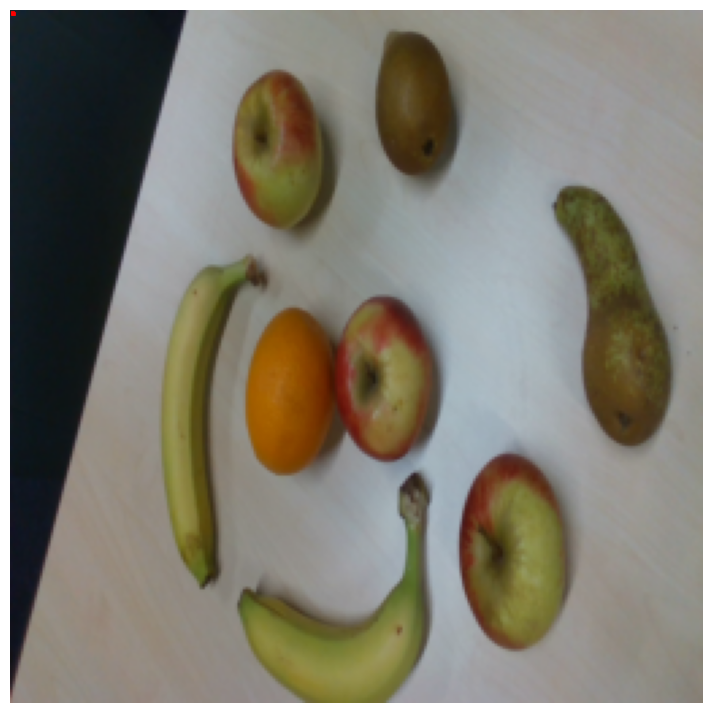

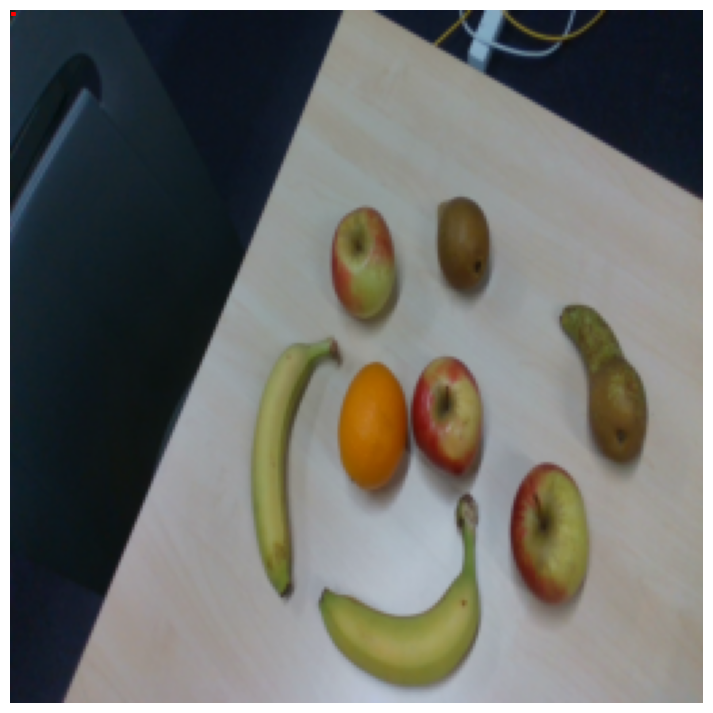

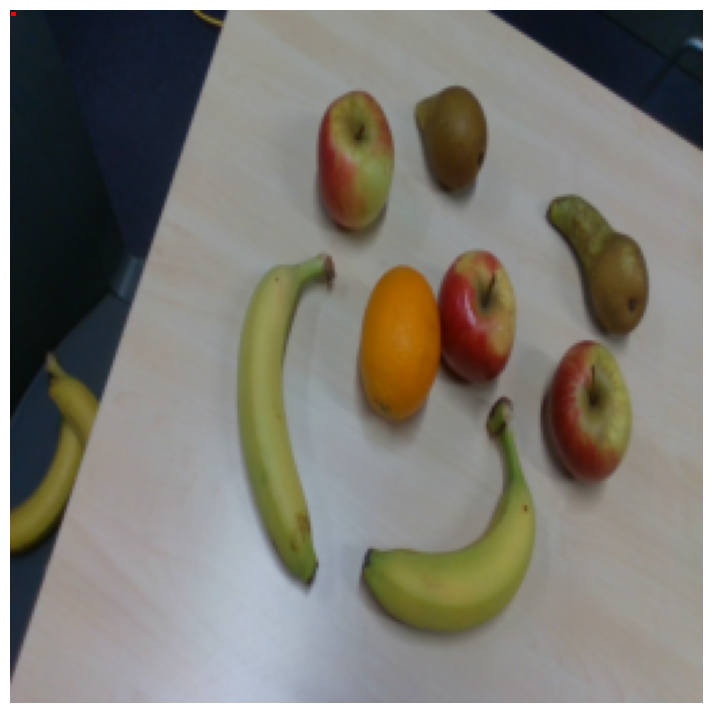

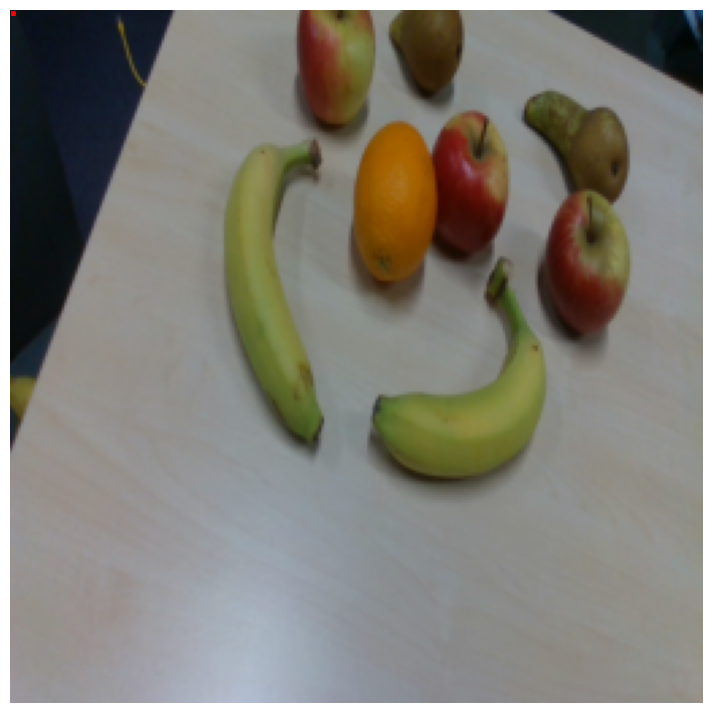

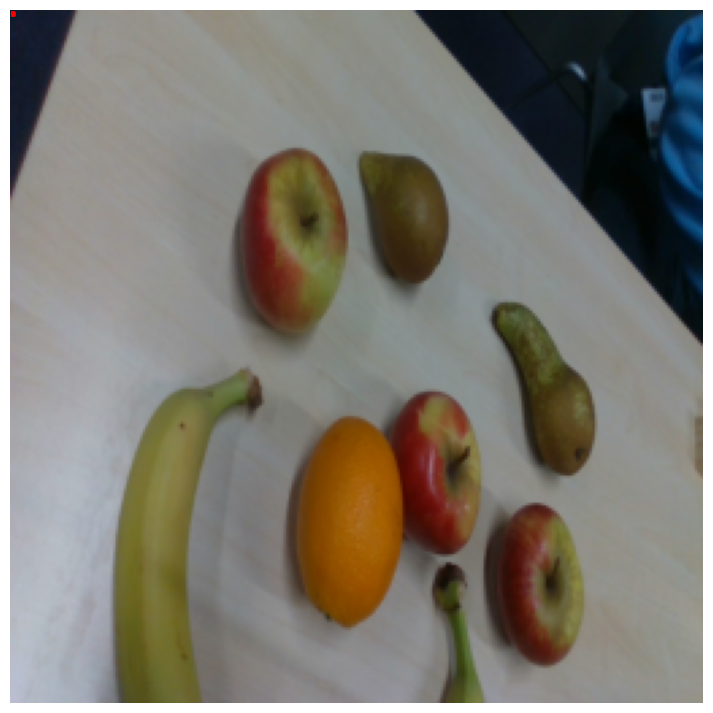

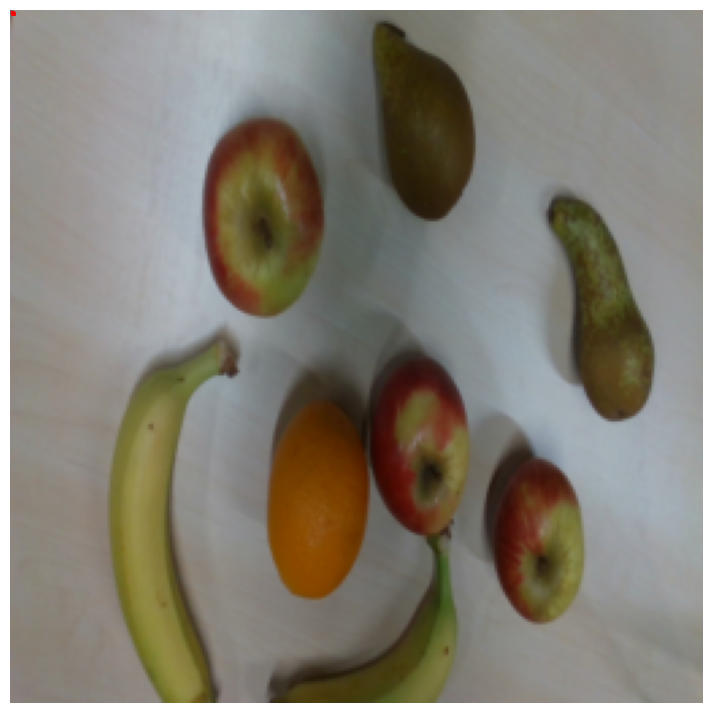

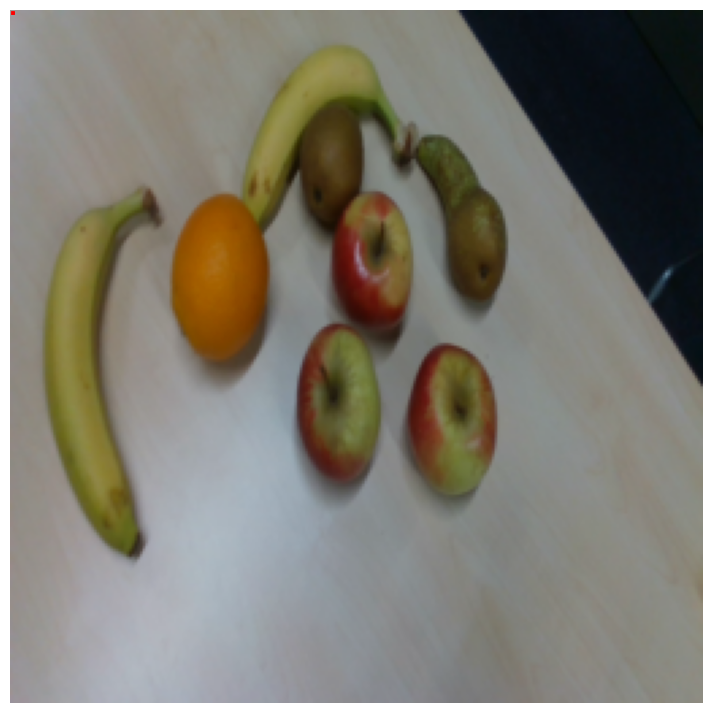

In [65]:
import matplotlib.pyplot as plt

display_imgs_bbox = []

for i in range(10):  # Display first 10 images
    img, target = train_dataset[i]
    labels = target["labels"]
    boxes = target["boxes"]

    img = img.permute(1, 2, 0).numpy()  # Convert from Tensor [C, H, W] to [H, W, C]

    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img)

    # Loop through the boxes and plot them
    for box in boxes:
        x_min, y_min, width, height = box
        ax.add_patch(plt.Rectangle((x_min, y_min), width, height, fill=False, color="red", linewidth=2))

    plt.axis('off')
    plt.show()
    display_imgs_bbox.append(img)


